# SPAM MESSAGE DETECTOR 

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [98]:
df = pd.read_csv('DataSet/train.csv')

### Visualize the Data

In [88]:
print("The training Data for spam detector : ")
df.head(10)

The training Data for spam detector : 


,id,label,message
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       31962 non-null  int64 
 1   label    31962 non-null  int64 
 2   message  31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


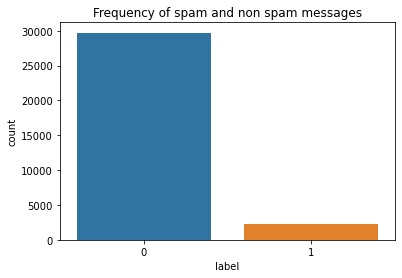

In [90]:
# frequency of spam and non spam message 
sns.countplot(data = df, x = df['label'])
plt.title("Frequency of spam and non spam messages")
plt.show()

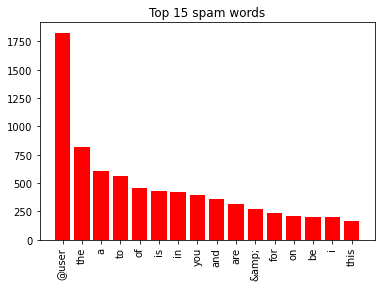

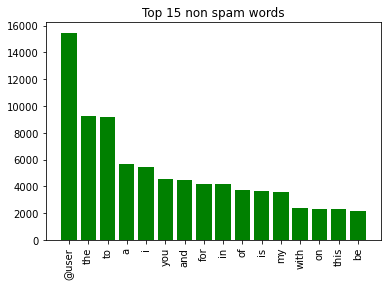

In [91]:
spam_data = df[df['label'] == 1]
non_spam_data = df[df['label'] == 0]

spam_message = spam_data['message']
non_spam_message = non_spam_data['message']

# unique word laballed as spam
l = [message.split() for message in spam_message]
spam_words = spam_words = list(itertools.chain.from_iterable(l))
        
k = [message.split() for message in non_spam_message]
no_spam_words = list(itertools.chain.from_iterable(k))


# dictionary containing frequency of spam and non spam words 
spam = Counter(spam_words)
non_spam = Counter(no_spam_words)


# sort according to the frequency descending 
non_spam = sorted(non_spam.items(), key=lambda kv: kv[1], reverse=True)
spam = sorted(spam.items(), key=lambda kv: kv[1], reverse=True)

top15_spam = spam[:16]
top15_nonspam = non_spam[:16]

top_words_nonspam = [i[0] for i in top15_nonspam]   
top_occurences_nonspam = [i[1] for i in top15_nonspam]
    
top_words_spam = [i[0] for i in top15_spam]       
top_occurences_spam = [i[1] for i in top15_spam]

# Visualize top 15 spam words
plt.bar(top_words_spam, top_occurences_spam, color = "red")
plt.title("Top 15 spam words")
plt.xticks(rotation='vertical')
plt.show()

# Visualize top 15 non spam words
plt.bar(top_words_nonspam, top_occurences_nonspam, color = 'green')
plt.title("Top 15 non spam words")
plt.xticks(rotation='vertical')
plt.show()


### Train the model

In [92]:
x = df['message']
y = df['label']

# split the data set into 75% training, 25% testing 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state = 0, test_size = 0.25)

cv = CountVectorizer(min_df = 0.01, max_features = 300, stop_words = 'english')  
cv.fit(X_train)

X_train = cv.transform(X_train)
X_test = cv.transform(X_test)

In [93]:
model = MultinomialNB()
model.fit(X_train, Y_train)

print(model.score(X_test, Y_test))

0.924665248404455


#### Confusion Matrix

In [94]:
Y_test_pred = model.predict(X_test)
confusion_matrix(Y_test, Y_test_pred)

array([[7303,  157],
       [ 445,   86]], dtype=int64)

In [95]:
def classifier(message):
    transformed = cv.transform([message])
    prediction =  model.predict(transformed)
    
    if prediction == 0:
        return "This message is no spam !"
    else:
        return "This message is spam !"
    
    
str = input("Enter the string : ")
classifier(str)

Enter the string : 


'This message is no spam !'

# SPAM DETECTION FOR A DATA SET

In [99]:
data = pd.read_csv('DataSet/test.csv')
data = data[:200]
data.head(10)

,id,message
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
5,31968,choose to be :) #momtips
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,31971,@user @user @user i will never understand why...
9,31972,#delicious #food #lovelife #capetown mannaep...


In [100]:
for message in data['message']:
    print(message + ' : ' + classifier(message))

#studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ¦  : This message is no spam !
 @user #white #supremacists want everyone to see the new â  #birdsâ #movie â and hereâs why   : This message is no spam !
safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!!  : This message is no spam !
is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð   #harrypotter #pottermore #favorite : This message is no spam !
  3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦  : This message is no spam !
choose to be   :) #momtips  : This message is no spam !
something inside me dies ð¦ð¿â¨  eyes ness #smokeyeyes #tired  #lonely #sof #grungeâ¦  : This message is no spam !
#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸â¤ï¸â¤ï¸â¤ï¸ #thanks#aleeee !!!  : This message is no spam !
 @user @user @user i will never understand why my dad left me when 